# CS_Student_Carrer_Prediction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cs_students.csv')

In [4]:
df.head()

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         180 non-null    int64  
 1   Name               180 non-null    object 
 2   Gender             180 non-null    object 
 3   Age                180 non-null    int64  
 4   GPA                180 non-null    float64
 5   Major              180 non-null    object 
 6   Interested Domain  180 non-null    object 
 7   Projects           180 non-null    object 
 8   Future Career      180 non-null    object 
 9   Python             180 non-null    object 
 10  SQL                180 non-null    object 
 11  Java               180 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 17.0+ KB


In [6]:
df.describe()

,Student ID,Age,GPA
count,180.000000,180.000000,180.000000
mean,90.500000,22.116667,3.615000
std,52.105662,2.823040,0.177341
min,1.000000,20.000000,3.200000
25%,45.750000,21.000000,3.500000
50%,90.500000,22.000000,3.600000
75%,135.250000,22.250000,3.700000
max,180.000000,37.000000,3.900000


In [7]:
df.shape

(180, 12)

- Data Preprocessing

-- In this the we don't need Student ID , Name, Major and Projects


In [8]:
useless_col = ['Student ID','Name','Major','Projects']
df.drop(columns = useless_col , inplace = True)
df.head()

,Gender,Age,GPA,Interested Domain,Future Career,Python,SQL,Java
0,Male,21,3.5,Artificial Intelligence,Machine Learning Researcher,Strong,Strong,Weak
1,Female,20,3.2,Data Science,Data Scientist,Average,Strong,Weak
2,Male,22,3.8,Software Development,Software Engineer,Strong,Strong,Average
3,Female,21,3.7,Web Development,Web Developer,Weak,Strong,Strong
4,Male,23,3.4,Cybersecurity,Information Security Analyst,Average,Weak,Strong


- Eda

<Axes: xlabel='Gender', ylabel='count'>

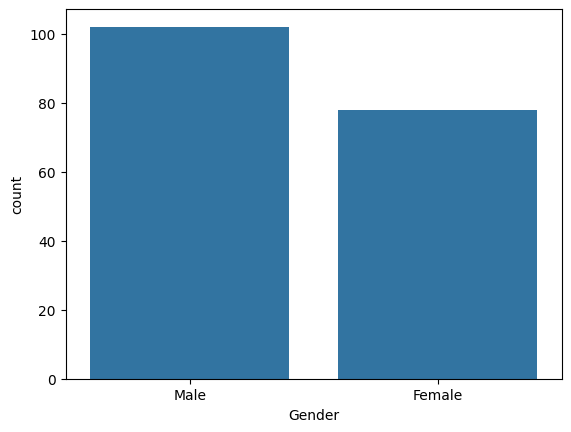

In [9]:
sns.countplot(x=df['Gender'])

<Axes: xlabel='Age', ylabel='count'>

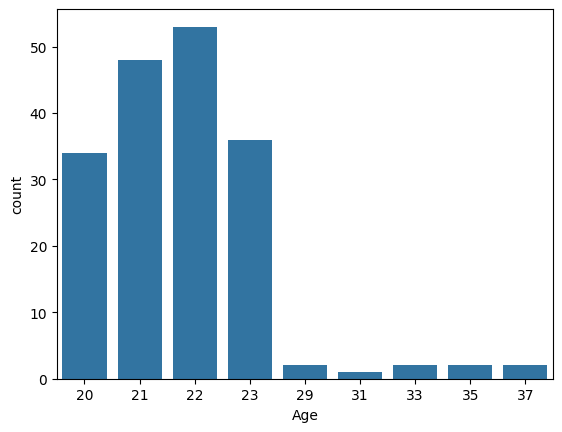

In [10]:
sns.countplot(x=df['Age'])

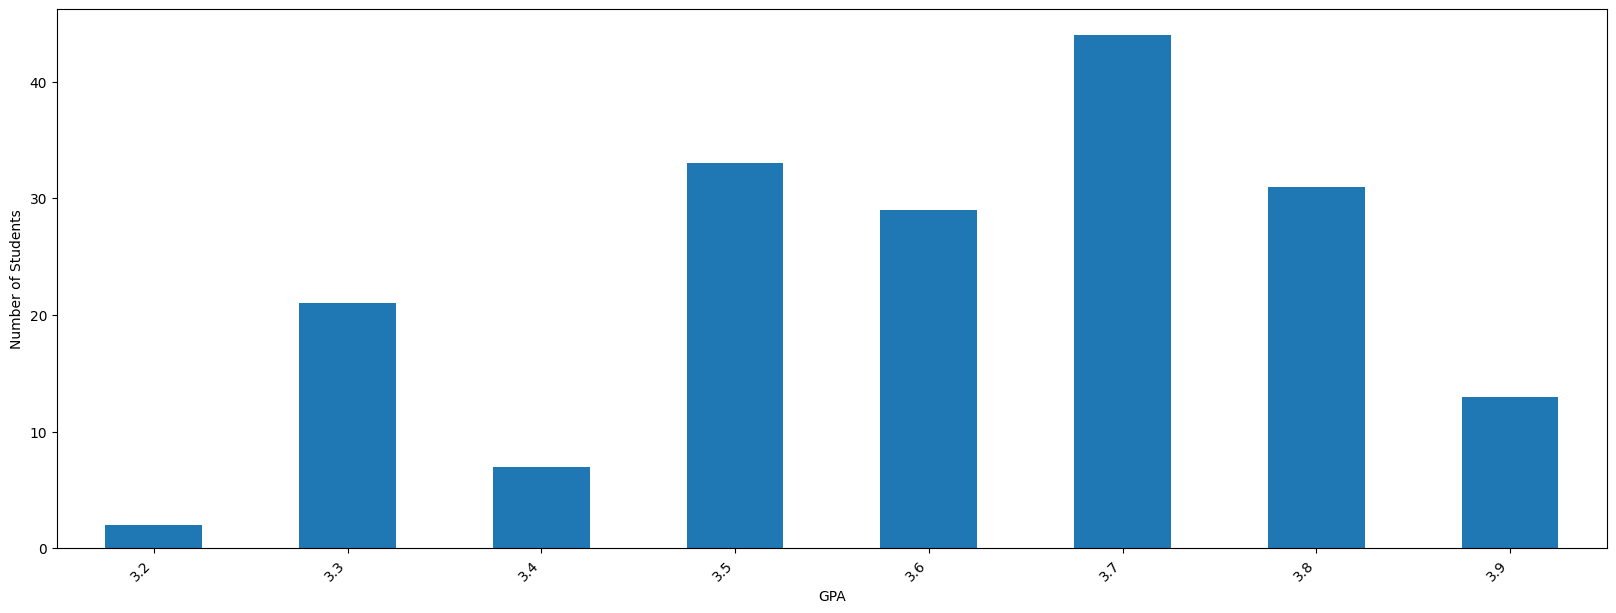

In [11]:
plt.figure(figsize=(20, 7))
ax = df.groupby('GPA').size().plot(kind='bar')
ax.set_xlabel('GPA')
ax.set_ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.show()

In [12]:
print(df['Interested Domain'].nunique())
print(df['Interested Domain'].value_counts())

27
Interested Domain
Artificial Intelligence           19
Web Development                   19
Cybersecurity                     18
Mobile App Development            17
Database Management               16
Cloud Computing                   16
Data Science                      13
Machine Learning                  13
Computer Graphics                 13
Software Development              11
Software Engineering               5
Quantum Computing                  2
Bioinformatics                     2
Human-Computer Interaction         2
Biomedical Computing               2
Distributed Systems                1
Geographic Information Systems     1
Data Privacy                       1
Information Retrieval              1
Blockchain Technology              1
Computer Vision                    1
Data Mining                        1
Natural Language Processing        1
IoT (Internet of Things)           1
Game Development                   1
Network Security                   1
Digital Forensics

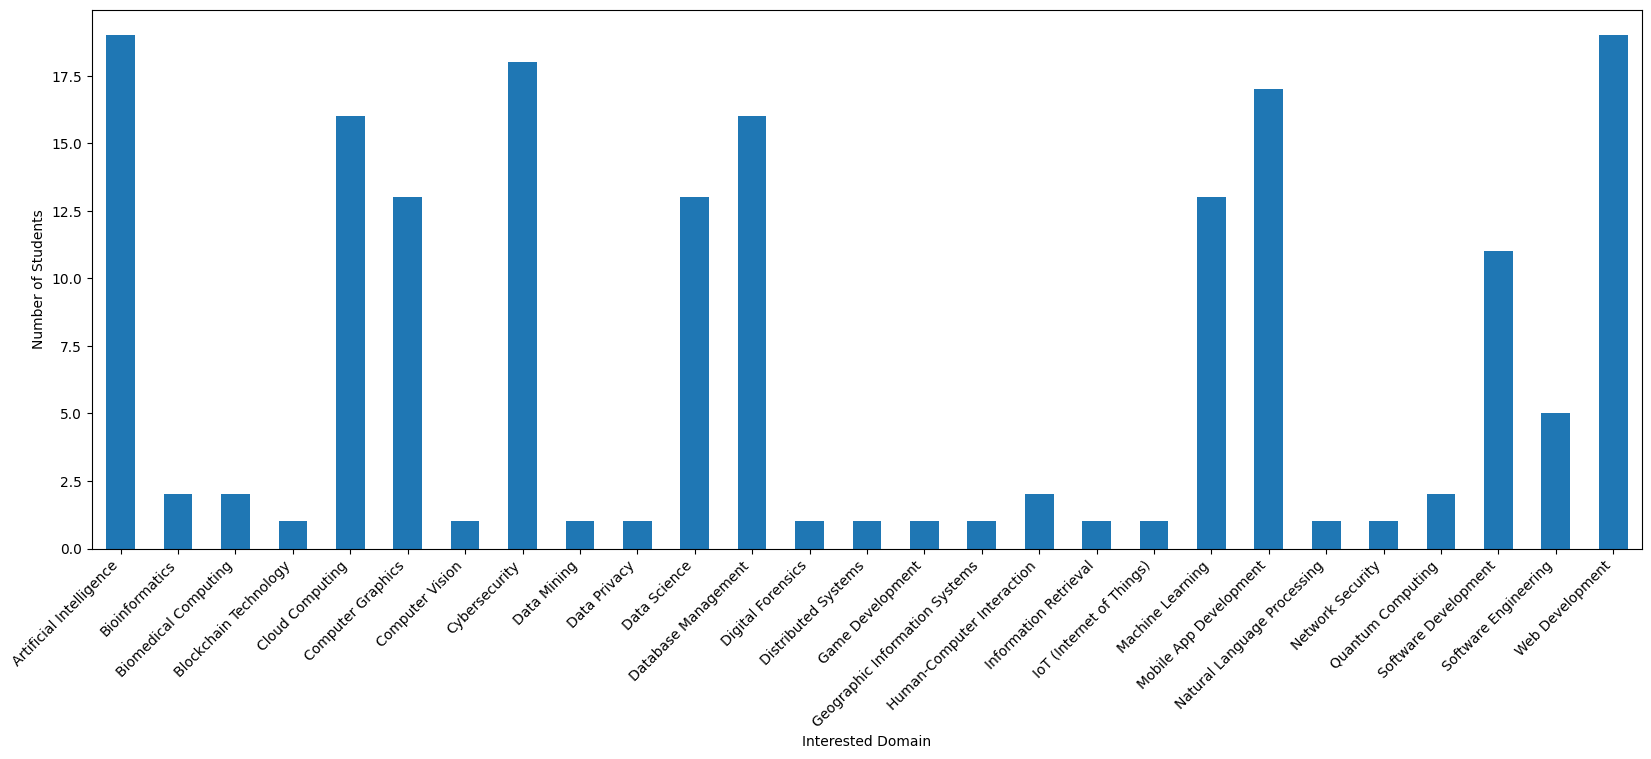

In [13]:
plt.figure(figsize=(20, 7))
ax = df.groupby('Interested Domain').size().plot(kind='bar')
ax.set_xlabel('Interested Domain')
ax.set_ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoding_col = ['Gender','Interested Domain','Python','SQL','Java']

encoder = LabelEncoder()
for col in encoding_col:
    df[col] = encoder.fit_transform(df[col])
df.head()    

,Gender,Age,GPA,Interested Domain,Future Career,Python,SQL,Java
0,1,21,3.5,0,Machine Learning Researcher,1,1,2
1,0,20,3.2,10,Data Scientist,0,1,2
2,1,22,3.8,24,Software Engineer,1,1,0
3,0,21,3.7,26,Web Developer,2,1,1
4,1,23,3.4,7,Information Security Analyst,0,2,1


In [15]:
df.isna().sum().sum()

0

In [16]:
df.duplicated().sum()

58

In [17]:
df.drop_duplicates()

,Gender,Age,GPA,Interested Domain,Future Career,Python,SQL,Java
0,1,21,3.5,0,Machine Learning Researcher,1,1,2
1,0,20,3.2,10,Data Scientist,0,1,2
2,1,22,3.8,24,Software Engineer,1,1,0
3,0,21,3.7,26,Web Developer,2,1,1
4,1,23,3.4,7,Information Security Analyst,0,2,1
...,...,...,...,...,...,...,...,...
159,1,23,3.7,4,Cloud Solutions Architect,1,1,2
160,0,20,3.8,20,Mobile App Developer,2,1,0
161,1,21,3.7,0,AI Researcher,1,2,0
163,1,23,3.6,26,Web Developer,2,1,0


In [18]:
df.describe()

,Gender,Age,GPA,Interested Domain,Python,SQL,Java
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.566667,22.116667,3.615000,12.627778,1.100000,0.894444,1.094444
std,0.496918,2.823040,0.177341,8.791839,0.777476,0.743668,0.781756
min,0.000000,20.000000,3.200000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,3.500000,5.000000,0.000000,0.000000,0.000000
50%,1.000000,22.000000,3.600000,11.000000,1.000000,1.000000,1.000000
75%,1.000000,22.250000,3.700000,20.000000,2.000000,1.000000,2.000000
max,1.000000,37.000000,3.900000,26.000000,2.000000,2.000000,2.000000


- Model

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [20]:
X = df.drop(['Future Career'],axis=1)
y = df['Future Career']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [21]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

In [22]:
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    # 'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',objective='multi:softmax'),
    'SVC': SVC(decision_function_shape='ovr'),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier()
}

In [23]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average = 'micro')
    recall = recall_score(y_test, y_pred,average = 'micro')
    f1 = f1_score(y_test, y_pred,average = 'micro')
    return accuracy, precision, recall, f1

In [24]:
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
# Create a DataFrame to display the results
results_data = pd.DataFrame(results)
results_data


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  wa

,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting,SVC,KNN,Naive Bayes,AdaBoost
Accuracy,0.416667,0.861111,0.694444,0.916667,0.25,0.75,0.722222,0.25
Precision,0.416667,0.861111,0.694444,0.916667,0.25,0.75,0.722222,0.25
Recall,0.416667,0.861111,0.694444,0.916667,0.25,0.75,0.722222,0.25
F1 Score,0.416667,0.861111,0.694444,0.916667,0.25,0.75,0.722222,0.25


In [25]:
gradientClassifier_model = GradientBoostingClassifier()

gradientClassifier_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = gradientClassifier_model.predict(X_test)
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17
0    1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
1    0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
2    0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
3    0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
4    0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
5    0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
6    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
7    0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
8    0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
9    0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
10   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
11   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
12   0 

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMet

In [27]:
import joblib

joblib.dump(gradientClassifier_model, 'CS_students_career_predictor.pkl')

['CS_students_career_predictor.pkl']